# Introduction
---
We have been approached by a vehicle distribution company that operates in over 20 countries. Our goal is to assist them in managing their product stock more effectively, enhancing their marketing communications, and acquiring new customers.

To achieve this, we will address several key questions that will enable the company to make informed, data-driven decisions:

- Question 1: Which products should we order more of or less of?
- Question 2: How should we tailor marketing and communication strategies to customer behaviors?
- Question 3: Where our customer are from?
- Question 4: How much can we spend on acquiring new customers?

1. [Packages Needed](#Package)

# Package
----
Will import a few packages that will help us in our analysis, dataset sits in a sql database.

In [163]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [164]:
!pip install ipython-sql
!pip install sqlalchemy

In [165]:
%%capture 
%load_ext sql
%sql sqlite:///stores.db
con = sqlite3.connect('stores.db')

# Exploring The Data
----
Since the dataset is stored in a SQL database, we will begin by exploring each table to familiarize ourselves with the data. Below is the schema for reference.

The scale model cars database schema is as follows.
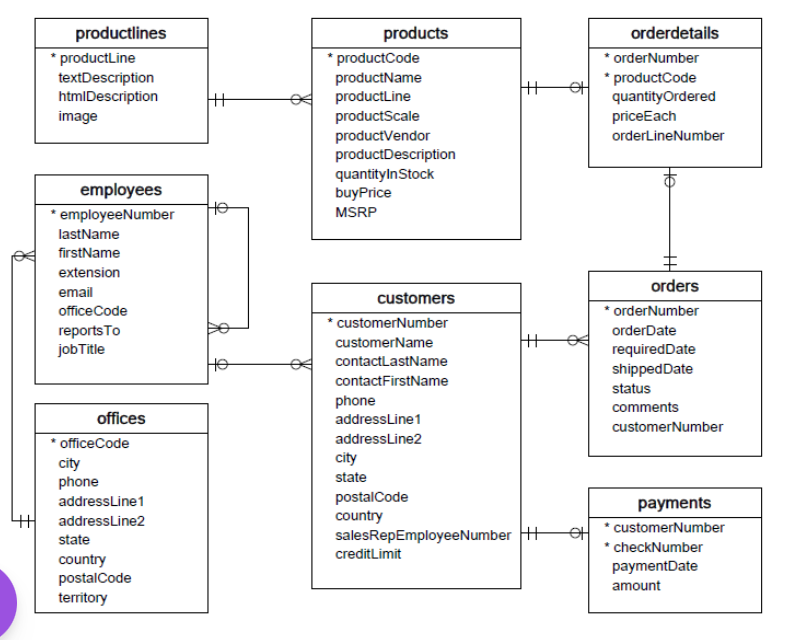
db browser animation
It contains eight tables:

- Customers: customer data
- Employees: all employee information
- Offices: sales office information
- Orders: customers' sales orders
- OrderDetails: sales order line for each sales order
- Payments: customers' payment records
- Products: a list of scale model cars
- ProductLines: a list of product line categories

In [166]:
%%sql
select 'customers' as table_name,
    (select count(*) from pragma_table_info('customers')) as number_of_attributes,
    (select count(*) from customers) as row_count
    
       UNION ALL
SELECT 'products' AS table_name, 
       (SELECT COUNT(*) FROM pragma_table_info('products')) AS number_of_rows, 
       (SELECT COUNT(*) FROM products) AS row_count

        UNION ALL
SELECT 'productlines' AS table_name, 
       (SELECT COUNT(*) FROM pragma_table_info('productlines')) AS number_of_rows, 
       (SELECT COUNT(*) FROM productlines) AS row_count

        UNION ALL
SELECT 'orders' AS table_name, 
       (SELECT COUNT(*) FROM pragma_table_info('orders')) AS number_of_rows, 
       (SELECT COUNT(*) FROM orders) AS row_count

        UNION ALL
SELECT 'orderdetails' AS table_name, 
       (SELECT COUNT(*) FROM pragma_table_info('orderdetails')) AS number_of_rows, 
       (SELECT COUNT(*) FROM orderdetails) AS row_count

        UNION ALL
SELECT 'payments' AS table_name, 
       (SELECT COUNT(*) FROM pragma_table_info('payments')) AS number_of_rows, 
       (SELECT COUNT(*) FROM payments) AS row_count

        UNION ALL
SELECT 'employees' AS table_name, 
       (SELECT COUNT(*) FROM pragma_table_info('employees')) AS number_of_rows, 
       (SELECT COUNT(*) FROM employees) AS row_count	

        UNION ALL
SELECT 'offices' AS table_name, 
       (SELECT COUNT(*) FROM pragma_table_info('offices')) AS number_of_rows, 
       (SELECT COUNT(*) FROM offices) AS row_count;	
    

 * sqlite:///stores.db
Done.


table_name,number_of_attributes,row_count
customers,13,122
products,9,110
productlines,4,7
orders,7,326
orderdetails,5,2996
payments,4,273
employees,8,23
offices,9,7


## Table Exploring
---

### `customers` 
**Description**: Detail information about the customer , where they are from and which sales agent is working with them. 

Columns:
- `customerNumber`: Unique identifier for each customer.
- `customerName`: The name of the customer.
- `contactLastName ,contactFirstName`: Contact person's first and last name.
- `phone`: Contact phone number.
- `addressLine1, addressLine2, city, state, postalCode`: Address of the customer.
-  `country`: Country the customer from. 
- `salesRepEmployeeNumber`: Sales Agent for that customer.
- `creditLimit`: Customer's credit limit.

In [167]:
%%sql
SELECT *
FROM customers LIMIT 5;

 * sqlite:///stores.db
Done.


customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370,21000
112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166,71800
114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611,117300
119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370,118200
121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504,81700


### `productlines` 
**Description**: Contains productlines information, including images and descriptions

Columns:
- `productLine`: Unique identifier.
- `textDescription`: Description about the product line in more detail.
- `htmlDescription`: HTML version of the description.
- `image`: Image of the product line.

In [168]:
%%sql
select *
from productlines
limit 5;

 * sqlite:///stores.db
Done.


productLine,textDescription,htmlDescription,image
Classic Cars,"Attention car enthusiasts: Make your wildest car ownership dreams come true. Whether you are looking for classic muscle cars, dream sports cars or movie-inspired miniatures, you will find great choices in this category. These replicas feature superb attention to detail and craftsmanship and offer features such as working steering system, opening forward compartment, opening rear trunk with removable spare wheel, 4-wheel independent spring suspension, and so on. The models range in size from 1:10 to 1:24 scale and include numerous limited edition and several out-of-production vehicles. All models include a certificate of authenticity from their manufacturers and come fully assembled and ready for display in the home or office.",None,None
Motorcycles,"Our motorcycles are state of the art replicas of classic as well as contemporary motorcycle legends such as Harley Davidson, Ducati and Vespa. Models contain stunning details such as official logos, rotating wheels, working kickstand, front suspension, gear-shift lever, footbrake lever, and drive chain. Materials used include diecast and plastic. The models range in size from 1:10 to 1:50 scale and include numerous limited edition and several out-of-production vehicles. All models come fully assembled and ready for display in the home or office. Most include a certificate of authenticity.",None,None
Planes,"Unique, diecast airplane and helicopter replicas suitable for collections, as well as home, office or classroom decorations. Models contain stunning details such as official logos and insignias, rotating jet engines and propellers, retractable wheels, and so on. Most come fully assembled and with a certificate of authenticity from their manufacturers.",None,None
Ships,"The perfect holiday or anniversary gift for executives, clients, friends, and family. These handcrafted model ships are unique, stunning works of art that will be treasured for generations! They come fully assembled and ready for display in the home or office. We guarantee the highest quality, and best value.",None,None
Trains,"Model trains are a rewarding hobby for enthusiasts of all ages. Whether you're looking for collectible wooden trains, electric streetcars or locomotives, you'll find a number of great choices for any budget within this category. The interactive aspect of trains makes toy trains perfect for young children. The wooden train sets are ideal for children under the age of 5.",None,None


### `orders` 
**Description**: Contains detail information about the order, date of the order, shipping data and etc. 

Columns:
- `orderNumber`: Unique identifier.
- `orderDate`: Date of which order was place.
- `requiredDate`: Date of which the customer needs the product.
- `shippedDate`: Date we shipped the product to the customer.
- `comments`: Additional information about the order.
- `customerNumber`: Customer ID.

In [169]:
%%sql
select *
from orders
limit 3;

 * sqlite:///stores.db
Done.


orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181


### `orderdetails` 
**Description**: Contains transaction detail for each line number based on their order number. 

Columns:
- `orderNumber`: order ID number.
- `productCode`: product ID number.
- `quantityOrder`: Total quantity purchased for that line number.
- `priceEach`: Price for each quantity ordered.
- `orderLineNumber`: Line number within the order.

In [170]:
%%sql
select *
from orderdetails
limit 3;

 * sqlite:///stores.db
Done.


orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
10100,S18_1749,30,136,3
10100,S18_2248,50,55.09,2
10100,S18_4409,22,75.46,4


### `payments` 
**Description**: Contains date of the payement made by the customer when purchasing the product. 

Columns:
- `customerNumnber`: customer ID number.
- `checkNumber`: Payment identifer.
- `paymentDate`: Date the payment was made.
- `amount`: Amount the customer paid.
 

In [171]:
%%sql
select *
from payments
limit 3;

 * sqlite:///stores.db
Done.


customerNumber,checkNumber,paymentDate,amount
103,HQ336336,2004-10-19,6066.78
103,JM555205,2003-06-05,14571.44
103,OM314933,2004-12-18,1676.14


### `employee` 
**Description**: Detailed information about each employee and their current job title.

Columns:
- `employeeNumber`: Unique ID of the employee.
- `first name. lastName`: The name of employee.
- `extension`: Call extension number of the employee.
- `email`: Email address of the employee.
- `officeCode`: Employee work locaiton .
- `reportsTo`: Employee manager. 
- `jobTitle`: Employee job title.

In [172]:
%%sql
select *
from employees
limit 3;

 * sqlite:///stores.db
Done.


employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,None,President
1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002,VP Sales
1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002,VP Marketing


### `office` 
**Description**: Detailed information of the office and location.

Columns:
- `officeCode`: Unique Identifer.
- `city, addressLine1, addressLine2, state, country, postalCode`: Location of the Office.
- `phone`: Phone number to call to the office.
- `territory`: Geographical area the office covers.

In [173]:
%%sql 
select *
from offices
limit 3;

 * sqlite:///stores.db
Done.


officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA


### `products` 
**Description**: Contains product information, including pricing, stock levels, and descriptions..

Columns:
- `productCode`: Unique identifier.
- `productName`: The name of product.
- `productLine`: Product Category.
- `productScale`: Product scale based on the ration 1:10.
- `productVendor`: The vendor who supplying the product.
- `productDescription`: Detailed description about the product.
- `quantityInStock`: Stock availability. 
- `buyPrice`: Cost of purchasing the product.
- `MSRP`: Manufacturer's Suggested Retail Price

# Question 1: Which Products Should We Order More of or Less of?

- This question refers to inventory reports, including low stock(i.e. product in demand) and product performance. This will optimize the supply and the user experience by preventing the best-selling products from going out-of-stock.

- The low stock represents the quantity of the sum of each product ordered divided by the quantity of product in stock. We can consider the ten highest rates. These will be the top ten products that are almost out-of-stock or completely out-of-stock.

- The product performance represents the sum of sales per product.

Priority products for restocking are those with high product performance that are on the brink of being out of stock.

We'll need the following two tables to perform these calculations: namely . . . 

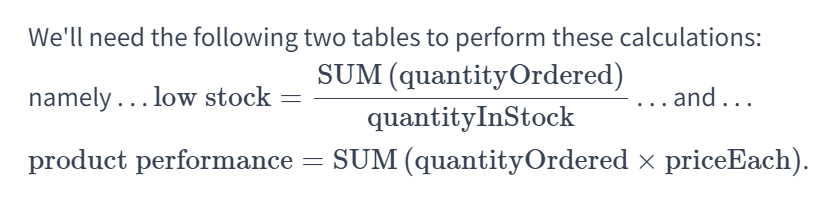

In [174]:
%%sql
--Note
with CTE1 as(
    
--Calculate Total Order(as Sum), low_stock
select productCode, productName,[Sum],quantityInStock, round([Sum]/quantityInStock,2) as [low_stock]
FROM (
    select productCode, productName, cast([Sum] as float) as[Sum], cast(quantityInStock as float) as quantityInStock 
    from
        (SELECT p.productCode, productName,  SUM(quantityOrdered) AS [Sum], 
               quantityInStock 
        FROM products p
        JOIN orderdetails o
        ON p.productCode = o.productCode
        GROUP BY p.productCode) AS Table1) as Table2
ORDER BY [Sum]/quantityInStock desc
),

--Calculate revenue from each product
CTE2 as(
    SELECT productCode,sum(quantityOrdered*priceEach) as [TotalRev]
    FROM orderdetails
    GROUP BY productCode
),
    
--Join 2 table and find top 10 performance products
CTE3 as (
    SELECT CTE1.productCode,productName, [low_stock], [TotalRev]
    FROM CTE1
    JOIN CTE2
    ON CTE1.productCode=CTE2.productCode
    ORDER BY [TotalRev] desc
    LIMIT 10
),
--Classify low_stock on TOP 10 Performance Products
CTE4 as (
    SELECT *,
            CASE WHEN [low_stock]>1 then "REPLENISH ASAP!"
                 WHEN [low_stock] between 0.9 and 1 then "Stock is under 10%"
            END AS [low_stock_classifier]
    FROM CTE3
    WHERE [low_stock]>=0.9
)
select * from CTE4

 * sqlite:///stores.db
Done.


productCode,productName,low_stock,TotalRev,low_stock_classifier
S12_1099,1968 Ford Mustang,13.72,161531.47999999992,REPLENISH ASAP!
S12_3891,1969 Ford Falcon,0.92,152543.02,Stock is under 10%


Out of the 10 best-selling products, only 2 require urgent restocking **ASAP**.

The Ford Mustang is one of the most sought-after collector cars and has been a popular icon for five decades, making it our 5th best-selling vehicle. Currently, demand has exceeded supply, and we must prioritize restocking it.

The Ford Falcon, our 6th best-seller, has stock levels below 10%. To prevent demand from surpassing supply, it is essential that we ensure adequate stock levels for this model as well.

   
        

## Additional Products need to resupply

However, there are 9 other products that also need urgent restocking **ASAP**, as supply has fallen short of demand. Although these items are not among the top 10 best-sellers, it is essential to meet customer demand to protect the business reputation and revenue.


In [175]:
%%sql
with CTE1 as(
    
--Calculate Total Order(as Sum), low_stock
select productCode, productName,[Sum],quantityInStock, round([Sum]/quantityInStock,2) as [low_stock]
FROM (
    select productCode, productName, cast([Sum] as float) as[Sum], cast(quantityInStock as float) as quantityInStock 
    from
        (SELECT p.productCode, productName,  SUM(quantityOrdered) AS [Sum], 
               quantityInStock 
        FROM products p
        JOIN orderdetails o
        ON p.productCode = o.productCode
        GROUP BY p.productCode) AS Table1) as Table2
ORDER BY [Sum]/quantityInStock desc
),

--Calculate revenue from each product
CTE2 as(
    SELECT productCode,sum(quantityOrdered*priceEach) as [TotalRev]
    FROM orderdetails
    GROUP BY productCode
),
    
--Join 2 table and find products need replenishing ASAP
CTE3 as (
    SELECT CTE1.productCode,productName, [low_stock],
                                CASE WHEN [low_stock]>1 then "REPLENISH ASAP!"
                                END AS [low_stock_classifier]
    FROM CTE1
    JOIN CTE2
    ON CTE1.productCode=CTE2.productCode
    WHERE CTE1.productCode != "S12_1099" and CTE1.productCode != "S12_3891" and [low_stock]>1
    ORDER BY [low_stock] desc
    
)
select * from CTE3

 * sqlite:///stores.db
Done.


productCode,productName,low_stock,low_stock_classifier
S24_2000,1960 BSA Gold Star DBD34,67.67,REPLENISH ASAP!
S32_4289,1928 Ford Phaeton Deluxe,7.15,REPLENISH ASAP!
S32_1374,1997 BMW F650 ST,5.7,REPLENISH ASAP!
S72_3212,Pont Yacht,2.31,REPLENISH ASAP!
S700_3167,F/A 18 Hornet 1/72,1.9,REPLENISH ASAP!
S50_4713,2002 Yamaha YZR M1,1.65,REPLENISH ASAP!
S18_2795,1928 Mercedes-Benz SSK,1.61,REPLENISH ASAP!
S18_2248,1911 Ford Town Car,1.54,REPLENISH ASAP!
S700_1938,The Mayflower,1.22,REPLENISH ASAP!
S32_3522,1996 Peterbilt 379 Stake Bed with Outrigger,1.21,REPLENISH ASAP!


#  Question 2: How Should We Match Marketing and Communication Strategies to Customer Behavior?

Before acquiring new customers, it’s essential to understand our current customer behavior. By analyzing this, we can tailor our marketing and communication strategies to better serve different customer segments. Specifically, we want to answer:

- **Who are our most valuable (VIP) customers?** Identifying these customers allows us to focus on retaining them by offering exclusive deals, personalized services, and loyalty programs.

- **Who are our least engaged customers?** Understanding why these customers are disengaged can help us re-engage them through targeted campaigns, personalized offers, or revisiting communication channels that may not have worked.

- **Where are they from?** Knowing the geographic distribution of our customers will enable us to localize marketing efforts, adapt language and messaging, and create region-specific promotions.

By mapping these customer behaviors, we can optimize our marketing communications, ensuring that VIPs feel valued, less-engaged customers are reactivated, and regional preferences are met. This data-driven approach helps us maximize the effectiveness of our marketing spend, improve customer satisfaction, and increase retention.

In [176]:
#Selecting VIP customers
statement="""
with CTE1 as (
    select *, case when [Profit]> 1 then "VIPP"
                end as [Customer_classifier]
    from
        (select o.customerNumber,contactFirstName, city,country, 
            sum(quantityOrdered*(priceEach-buyPrice)) as [Profit],  
            sum(quantityOrdered*priceEach) as [Rev]
        from orders o
        join orderdetails od
        on od.orderNumber=o.orderNumber
        join products p
        on p.productCode=od.productCode
        join customers c
        on o.customerNumber=c.customerNumber
        group by o.customerNumber) as Table1
    order by [Profit] desc
    limit 5
),
CTE2 as(
    select *, case when [Profit]> 1 then "Lease Engaged Customer"
                end as [Customer_classifier]
    from
        (select o.customerNumber,contactFirstName, city,country, 
            sum(quantityOrdered*(priceEach-buyPrice)) as [Profit],
            sum(quantityOrdered*priceEach) as [Rev]
        from orders o
        join orderdetails od
        on od.orderNumber=o.orderNumber
        join products p
        on p.productCode=od.productCode
        join customers c
        on o.customerNumber=c.customerNumber
        group by o.customerNumber) as Table1
    order by [Profit] 
    limit 5
),
CTE3 as(
    select *
    from CTE1
    union all
    select * 
    from CTE2
)
select * from CTE3
"""
df=pd.read_sql_query(statement, con)

In [177]:
df

,customerNumber,contactFirstName,city,country,Profit,Rev,Customer_classifier
0,141,Diego,Madrid,Spain,326519.66,820689.54,VIPP
1,124,Susan,San Rafael,USA,236769.39,591827.34,VIPP
2,151,Jeff,NYC,USA,72370.09,177913.95,VIPP
3,114,Peter,Melbourne,Australia,70311.07,180585.07,VIPP
4,119,Janine,Nantes,France,60875.30,158573.12,VIPP
5,219,Mary,Glendale,USA,2610.87,7918.60,Lease Engaged Customer
6,198,Leslie,Brickhaven,USA,6586.02,21554.26,Lease Engaged Customer
7,473,Franco,Milan,Italy,9532.93,25358.32,Lease Engaged Customer
8,103,Carine,Nantes,France,10063.80,22314.36,Lease Engaged Customer
9,489,Thomas,London,UK,10868.04,29586.15,Lease Engaged Customer


In [178]:
#calculate profit margin
df["Profit Margin"]=df["Profit"]/df["Rev"]*100
df

,customerNumber,contactFirstName,city,country,Profit,Rev,Customer_classifier,Profit Margin
0,141,Diego,Madrid,Spain,326519.66,820689.54,VIPP,39.786015
1,124,Susan,San Rafael,USA,236769.39,591827.34,VIPP,40.006498
2,151,Jeff,NYC,USA,72370.09,177913.95,VIPP,40.677018
3,114,Peter,Melbourne,Australia,70311.07,180585.07,VIPP,38.935151
4,119,Janine,Nantes,France,60875.30,158573.12,VIPP,38.389419
5,219,Mary,Glendale,USA,2610.87,7918.60,Lease Engaged Customer,32.971359
6,198,Leslie,Brickhaven,USA,6586.02,21554.26,Lease Engaged Customer,30.555538
7,473,Franco,Milan,Italy,9532.93,25358.32,Lease Engaged Customer,37.592908
8,103,Carine,Nantes,France,10063.80,22314.36,Lease Engaged Customer,45.100106
9,489,Thomas,London,UK,10868.04,29586.15,Lease Engaged Customer,36.733539


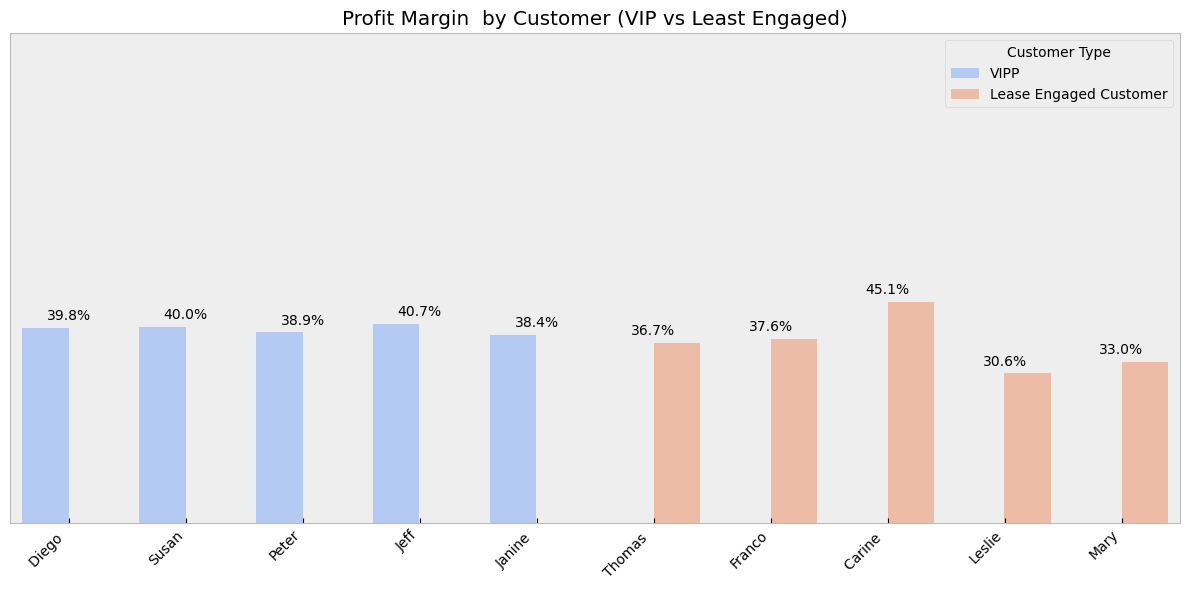

In [179]:
#Sort the DataFrame by total_revenue in descending order
df1=df.sort_values(by="Rev",ascending=False)

#Create a figure and a set of subplots with a secondary_axis
fig,ax1= plt.subplots(figsize=(12,6))

# Bar chart for profit margin
sns.barplot(x='contactFirstName', y='Profit Margin', hue="Customer_classifier" ,data=df1, palette='coolwarm', ax=ax1)

# Add numbers to the bars (profit margin)
for index, value in enumerate(df1['Profit Margin']):
    ax1.text(index, value + 1, f'{value:.1f}%', va='bottom', ha='center')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the profit margin axis on the left
ax1.set_ylim(0, 100)  # Set limit for profit margin (0 to 100%)
ax1.set_yticks(range(0, 101, 10))  # Set ticks for profit margin

# Remove the title for customer names
ax1.set_xlabel('')  # Clear the x-axis label

# Remove the profit margin axis (if desired, just set y-ticks and limits)
ax1.yaxis.set_visible(False)

# Adding a legend for the customer types (VIP/Least Engaged) in the top right
ax1.legend(title='Customer Type', loc='upper right')

# Add title
ax1.set_title('Profit Margin  by Customer (VIP vs Least Engaged)')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

From the table, we can see that **Diego & Susan** are our most valuable customers, making it worthwhile to offer them additional perks such as exclusive access to new products, personalized discounts, or invitation-only events.

On the other hand, **Carine&Franco** are our least engaged customers, yet they both exhibit the highest profit margins.

This indicates significant potential for growth. Therefore, it is advisable to implement targeted marketing campaigns aimed at re-engaging these customers through special discounts or loyalty points.

# Question 3: Where are they from?

Upon further examination of our VIP customers, we find that while two of our best customers are from the USA, our top customer is actually from Spain. Additionally, two of our least engaged customers are also based in the USA.

This situation warrants an analysis of the profit margins for customers in the USA compared to those in the rest of the world (ROW).

In [180]:
statement="""
select country_classifier, sum([Profit]) as [Profit]
from
    (select contactFirstName, [Profit], country, 
                                case when country="USA" then "USA"
                                else "The others"
                                end as [country_classifier]

    from
            (select o.customerNumber,contactFirstName, city,country, 
                sum(quantityOrdered*(priceEach-buyPrice)) as [Profit],
                sum(quantityOrdered*priceEach) as [Rev]
            from orders o
            join orderdetails od
            on od.orderNumber=o.orderNumber
            join products p
            on p.productCode=od.productCode
            join customers c
            on o.customerNumber=c.customerNumber
            group by o.customerNumber) as Table1) as Table2
group by [country_classifier]
"""
df2=pd.read_sql_query(statement, con)
df2

,country_classifier,Profit
0,The others,2517064.66
1,USA,1308815.59


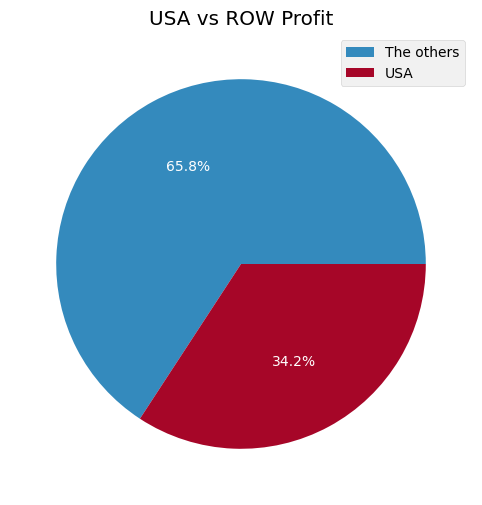

In [181]:
# Plot the pie chart

# Plot the pie chart without labels on the slices
df2.set_index('country_classifier').plot(
    y='Profit',
    kind='pie',
    autopct='%1.1f%%',  # Percentage on slices
    labels=None,  # Remove slice labels,
    textprops={'color': 'white'} ,
    figsize=(8, 6)
)

# Adding a title
plt.title('USA vs ROW Profit')
plt.ylabel('')  # Hides the y-label for better aesthetics
plt.style.use('bmh')
plt.show()

In [182]:
##Profit by Countries
statement='''
select country,sum(quantityOrdered*(priceEach-buyPrice)) as [Profit]
from orders o
join orderdetails od
on od.orderNumber=o.orderNumber
join products p
on p.productCode=od.productCode
join customers c
on o.customerNumber=c.customerNumber
group by country
order by sum(quantityOrdered*(priceEach-buyPrice)) desc
limit 5

'''
df3=pd.read_sql_query(statement,con)



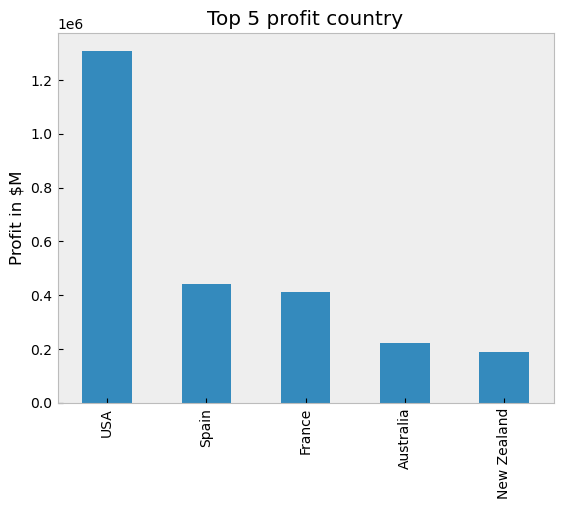

In [183]:
## Phần này mình muốn hiện thêm cả 1 vòng tròn % trong cùng 1 chỗ => xem lại subplot
df3.plot(kind="bar",x="country",y="Profit",grid=False, legend=False)
plt.title("Top 5 profit country")
plt.xlabel("")
plt.ylabel('Profit in $M')
plt.show()

The USA contributes 34% of the total profit for the business. However, we also have a robust presence in Spain, France, and Australia, all of which significantly enhance our overall performance.

# Question 4: How Much Can We Spend on Acquiring New Customers?
---

Before we can answer this question, we need to evaluate our monthly customer growth. Are we experiencing a decline? Should we prioritize acquiring new customers, or can we focus on re-engaging our existing customer base instead?

Once we assess the situation, we can calculate the Customer Lifetime Value (CLV).

Understanding the CLV will enable the company to make informed decisions regarding how much it can invest in acquiring new customers while still maintaining profitability.


Before answering this question, let's find the number of new customers arriving each month. That way we can check if it's worth spending money on acquiring new customers. This query helps to find these numbers.

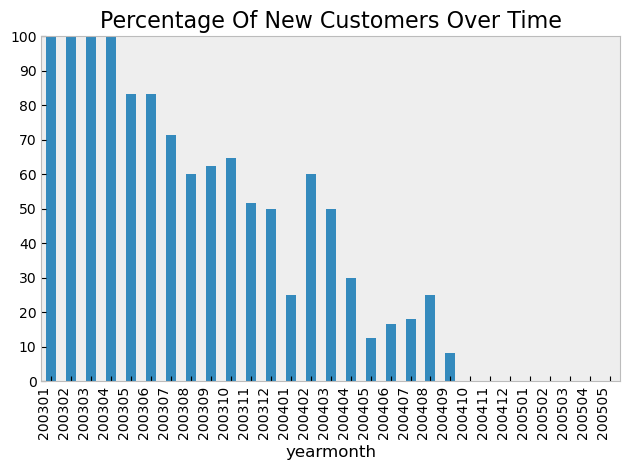

In [184]:
df3 = pd.read_sql("""

WITH firstPurchase AS 
(
   SELECT
      customerNumber,
      MIN(orderDate) AS firstPurchase,
      strftime('%Y%m', min(orderDate)) AS yearmonth 
   FROM
      orders 
   GROUP BY
      customerNumber 
)
,
firstPurchaseCount AS 
(
   SELECT
      yearmonth,
      COUNT(*) AS num_of_new_customers 
   FROM
      firstPurchase 
   GROUP BY
      yearmonth 
)
,
totalPurchaseCount AS 
(
   SELECT
      strftime('%Y%m', orderDate) AS yearmonth,
      COUNT(DISTINCT customerNumber) AS num_of_customers 
   FROM
      orders 
   GROUP BY
      yearmonth 
)
SELECT
   tpc.*,
   fpc.num_of_new_customers,
   round((cast(fpc.num_of_new_customers as real) / cast(tpc.num_of_customers as real)), 3)*100 as pct_of_new_customers
FROM
   totalPurchaseCount as tpc 
    Left JOIN
      firstPurchaseCount as fpc 
      ON tpc.yearmonth = fpc.yearmonth;""",con)

# Bar chart for pct_of_new_customers

df3.plot(
    x='yearmonth', 
    y='pct_of_new_customers',
    kind = 'bar', 
    legend = False,
    #set limit for % from 0 to 100
    ylim = (0,100),
    #Set ticks for %
    yticks = range(0, 101, 10),
    grid = False
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Remove the title for yearmonth
ax1.set_xlabel('')  # Clear the x-axis label
ax1.set_ylabel('')  # Clear the x-axis label
# Add a title to the chart
plt.title('Percentage Of New Customers Over Time', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


**Calculate Custumer Life-time Value**

In [185]:

%%sql
select avg([Profit]) from    
    (select o.customerNumber,contactLastName, contactFirstName,city,country, sum(quantityOrdered*(priceEach-buyPrice)) as [Profit]
    from orders o
    join customers c
    on c.customerNumber=o.customerNumber
    join orderdetails od
    on od.orderNumber=o.orderNumber
    join products p
    on p.productCode=od.productCode
    group by o.customerNumber) as PVT1


 * sqlite:///stores.db
Done.


avg([Profit])
39039.59438775511


As you can see, the number of clients has been decreasing since 2003, and in 2004, we had the lowest values. The year 2005, which is present in the database as well, isn't present in the table above, this means that the store has not had any new customers since September of 2004. This means it makes sense to spend money acquiring new customers.

To determine how much money we can spend acquiring new customers, we can compute the Customer Lifetime Value (LTV), which represents the average amount of money a customer generates. We can then determine how much we can spend on marketing.

In [186]:
statement="""
select avg([Profit]) from    
    (select o.customerNumber,contactLastName, contactFirstName,city,country, sum(quantityOrdered*(priceEach-buyPrice)) as [Profit]
    from orders o
    join customers c
    on c.customerNumber=o.customerNumber
    join orderdetails od
    on od.orderNumber=o.orderNumber
    join products p
    on p.productCode=od.productCode
    group by o.customerNumber) as PVT1
"""
pd.read_sql_query(statement, con)

,avg([Profit])
0,39039.594388


LTV tells us how much profit an average customer generates during their lifetime with our store. We can use it to predict our future profit. So, if we get ten new customers next month, we'll earn 390,395 dollars, and we can decide based on this prediction how much we can spend on acquiring new customers.

# Conclusion
----
To improve the company’s performance in product supply, customer retention, and acquisition:

- **Product Restocking**: Products like the Ford Mustang and nine others need immediate restocking due to high demand. The Ford Falcon also requires replenishment as stock is below 10%.
- **Customer Engagement**: Top customers, such as Diego Freyre from Spain and those in the USA, are valuable and should be offered perks to maintain engagement. Re-engage less active, high-margin customers through special discounts or loyalty programs.
- **Customer Acquisition**: The company has not acquired new customers since September 2004 (an 8-month drought). To target new customers, limit spending to $39k, focusing on the top five countries: USA, Spain, France, Australia, and New Zealand.


---

**By Hoang Anh**